In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew,norm

In [2]:
mydata = pd.read_csv(r"C:\Users\Rahul-Akshay\Desktop\hackathon\hackathon_rentomter_nobroker.csv")

In [3]:
mydata.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit'],
      dtype='object')

In [4]:
mydata = mydata.drop(['id'],axis = 1)

In [5]:
#handling time series data
year = mydata.activation_date.str.slice(0,4).astype(int)

In [7]:
mydata.activation_date.head()

0    2018-07-05 17:09:49
1    2017-12-30 17:22:12
2    2017-07-11 15:42:05
3    2018-07-07 14:26:14
4    2017-09-27 12:19:28
Name: activation_date, dtype: object

In [8]:
month = mydata.activation_date.str.slice(5,7).astype(int)

In [9]:
date = mydata.activation_date.str.slice(8,10).astype(int)

In [11]:
hour = mydata.activation_date.str.slice(11,13).astype(int)

0    17
1    17
2    15
3    14
4    12
Name: activation_date, dtype: int32


In [12]:
minutes = mydata.activation_date.str.slice(14,16).astype(int)

0     9
1    22
2    42
3    26
4    19
Name: activation_date, dtype: int32


In [13]:
mydata['year'] = year

In [14]:
mydata['month'] = month

In [15]:
mydata['date'] = date

In [16]:
mydata['hour'] = hour

In [17]:
mydata['minutes'] = minutes

In [18]:
mydata.columns

Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit', 'year',
       'month', 'date', 'hour', 'minutes'],
      dtype='object')

In [19]:
mydata = mydata.drop(['activation_date'],axis = 1)

In [20]:
#Encoding cyclical continuous features
mydata['hr_sin'] = np.sin(mydata.hour*(2.*np.pi/24))
mydata['hr_cos'] = np.cos(mydata.hour*(2.*np.pi/24))
mydata['mnth_sin'] = np.sin((mydata.month-1)*(2.*np.pi/12))
mydata['mnth_cos'] = np.cos((mydata.month-1)*(2.*np.pi/12))

In [21]:
mydata.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'amenities', 'water_supply', 'building_type',
       'balconies', 'rent', 'deposit', 'year', 'month', 'date', 'hour',
       'minutes', 'hr_sin', 'hr_cos', 'mnth_sin', 'mnth_cos'],
      dtype='object')

In [22]:
mydata['minute_sin'] = np.sin(mydata.hour*(2.*np.pi/60))
mydata['minute_cos'] = np.cos(mydata.hour*(2.*np.pi/60))

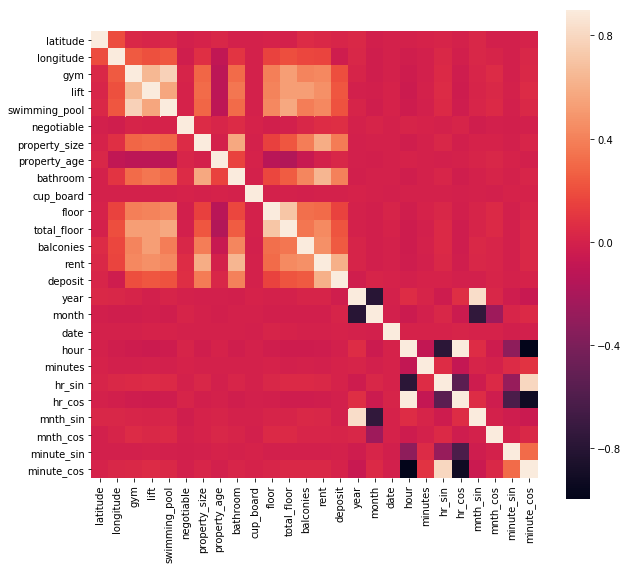

In [23]:
#correlation matrix
corrmat = mydata.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

In [24]:
mydata['rent'].describe()

count    25000.000000
mean     19075.588600
std       8468.705114
min       8000.000000
25%      12500.000000
50%      17500.000000
75%      24000.000000
max      50000.000000
Name: rent, dtype: float64

In [25]:
mydata.isnull().sum()

type             0
locality         0
latitude         0
longitude        0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
amenities        0
water_supply     0
building_type    0
balconies        0
rent             0
deposit          0
year             0
month            0
date             0
hour             0
minutes          0
hr_sin           0
hr_cos           0
mnth_sin         0
mnth_cos         0
minute_sin       0
minute_cos       0
dtype: int64

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


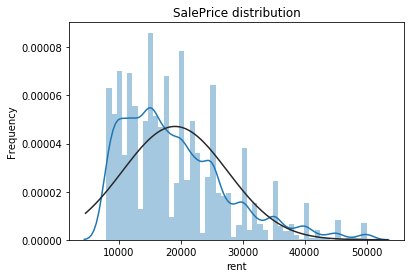

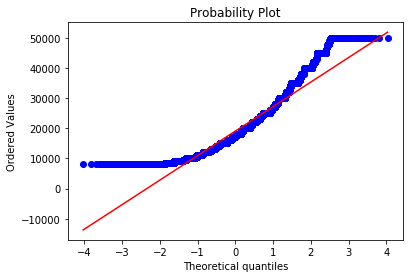

In [26]:
# Kernel Density Plot
sns.distplot(mydata.rent,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(mydata['rent']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(mydata['rent'], plot=plt)
plt.show()

In [27]:
#skewness and kurtosis
print("Skewness: %f" % mydata['rent'].skew())
print("Kurtosis: %f" % mydata['rent'].kurt())

Skewness: 1.065753
Kurtosis: 1.046220


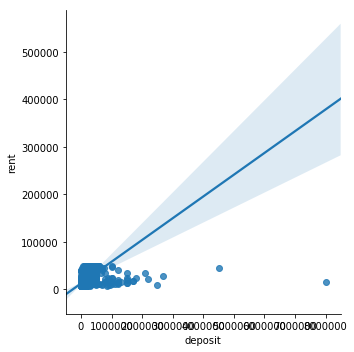

In [28]:
var = 'deposit'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

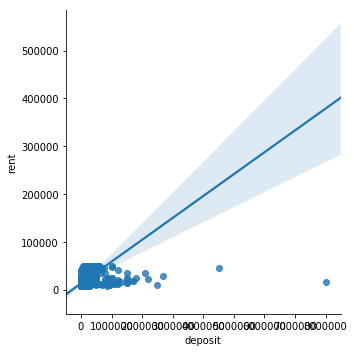

In [30]:
var = 'deposit'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

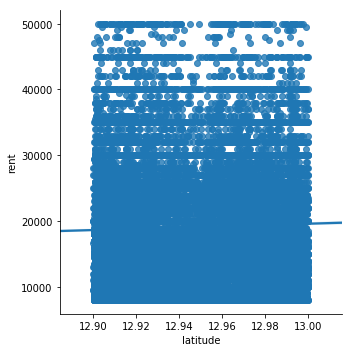

In [31]:
var = 'latitude'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

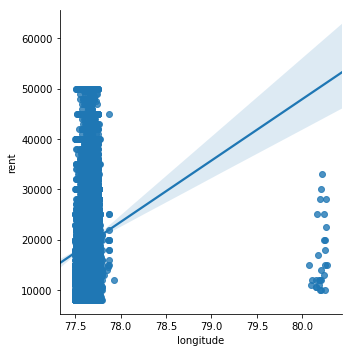

In [32]:
var = 'longitude'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

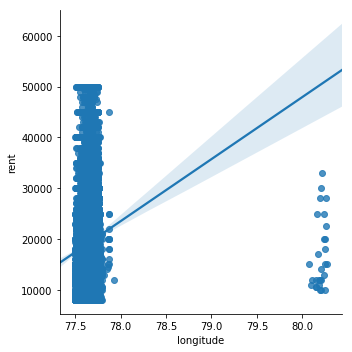

In [34]:
var = 'longitude'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

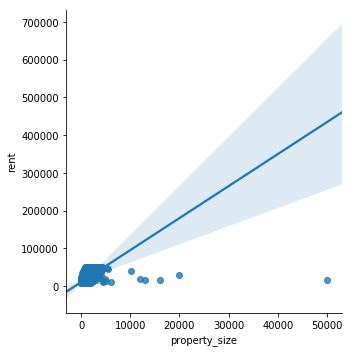

In [35]:
var = 'property_size'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

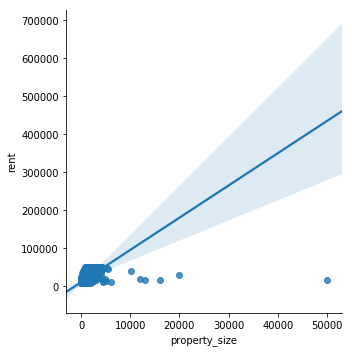

In [37]:
var = 'property_size'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

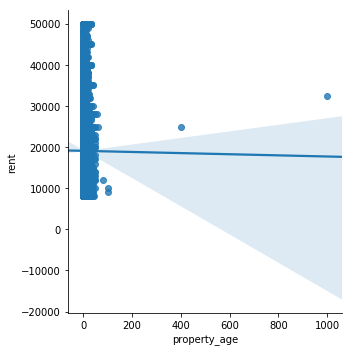

In [38]:
var = 'property_age'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

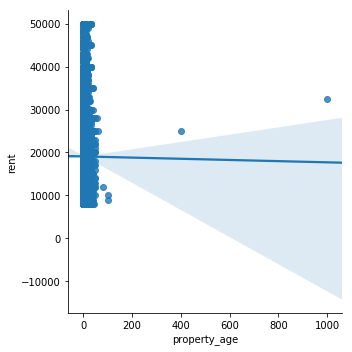

In [40]:
var = 'property_age'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
sns.lmplot(x=var, y='rent',data = mydata);

In [41]:
#handling categorical data
mydata = mydata.replace(['BHK1','BHK2','BHK3','BHK4','RK1','BHK4PLUS'],[0,1,2,3,4,5],inplace=False)

In [42]:
mydata = mydata.replace(['FAMILY','ANYONE','BACHELOR','COMPANY'],[0,1,2,3],inplace=False)

In [43]:
mydata = mydata.replace(['NOT_FURNISHED','SEMI_FURNISHED','FULL_FURNISHED'],[0,1,2],inplace=False)

In [44]:
mydata = mydata.replace(['NONE','TWO_WHEELER','FOUR_WHEELER','BOTH'],[0,1,2,3],inplace=False)

In [45]:
mydata = mydata.replace(['CORP_BORE','CORPORATION','BOREWELL'],[0,1,2],inplace=False)

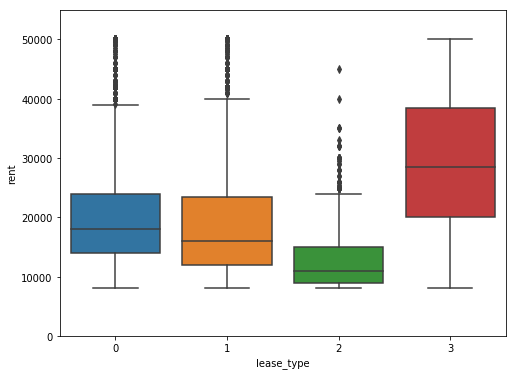

In [46]:
#box plot
var = 'lease_type'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=55000);

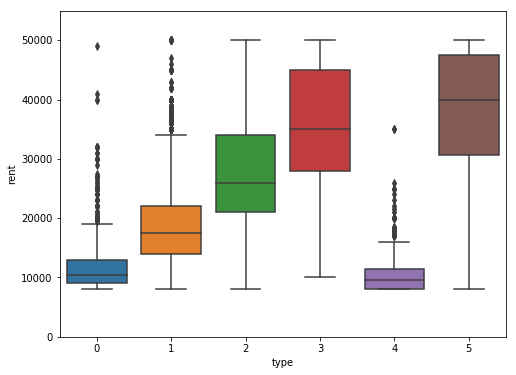

In [47]:
var = 'type'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=55000);

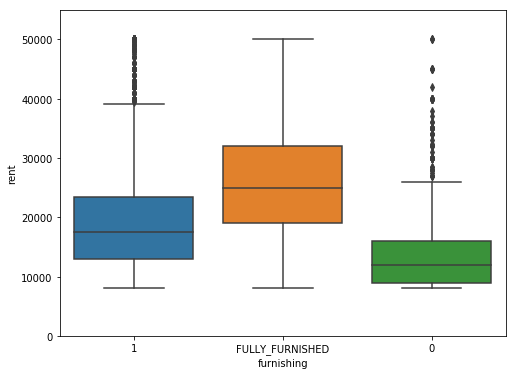

In [48]:
var = 'furnishing'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=55000);

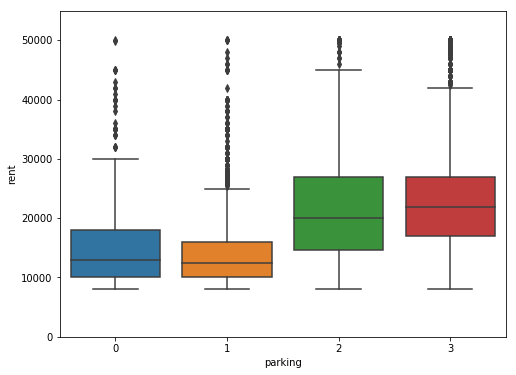

In [49]:
var = 'parking'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=55000);

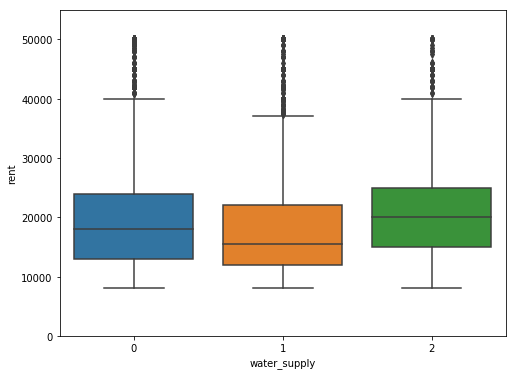

In [50]:
var = 'water_supply'
data = pd.concat([mydata['rent'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=55000);

In [51]:
#skewness and kurtosis
print("Skewness: %f" % mydata['rent'].skew())
print("Kurtosis: %f" % mydata['rent'].kurt())

Skewness: 1.065753
Kurtosis: 1.046220


In [52]:
#handling an attribute with dictionary in string
#handling amenities feature

values = []

for i in mydata.amenities:
    import json
    json_acceptable_string = i.replace("'","\"")
    d=json.loads(json_acceptable_string)
    values.append(list(d.values()))

df = pd.DataFrame([],columns=d.keys())   
df1 = pd.DataFrame(values,columns = df.columns)
df1

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False
2,True,False,True,False,True,True,False,True,True,False,True,True,True,True,True,False,False,True,False
3,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
4,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
8,False,False,False,False,True,False,False,True,False,False,False,True,None,None,None,None,None,None,None
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
#concating two dataframes

mydata = pd.concat([mydata,df1],axis=1)

In [55]:
mydata.drop(['amenities'],axis=1,inplace = True)

In [56]:
mydata.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'rent', 'deposit', 'year', 'month', 'date', 'hour', 'minutes', 'hr_sin',
       'hr_cos', 'mnth_sin', 'mnth_cos', 'minute_sin', 'minute_cos', 'LIFT',
       'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS',
       'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP'],
      dtype='object')

In [57]:
mydata.shape

(25000, 53)

In [58]:
#assigning the target variable
target = mydata['rent']

In [59]:
mydata.drop(['gym','lift','swimming_pool','hour','month','year'],axis=1,inplace=True)

In [60]:
mydata.shape

(25000, 47)

In [61]:
#checking the missing values
missing_values = mydata.isnull().sum()/len(mydata)*100

In [62]:
missing_values

type             0.000
locality         0.000
latitude         0.000
longitude        0.000
lease_type       0.000
negotiable       0.000
furnishing       0.000
parking          0.000
property_size    0.000
property_age     0.000
bathroom         0.000
facing           0.000
cup_board        0.000
floor            0.000
total_floor      0.000
water_supply     0.000
building_type    0.000
balconies        0.000
rent             0.000
deposit          0.000
date             0.000
minutes          0.000
hr_sin           0.000
hr_cos           0.000
mnth_sin         0.000
mnth_cos         0.000
minute_sin       0.000
minute_cos       0.000
LIFT             0.000
GYM              0.000
INTERNET         0.000
AC               0.000
CLUB             0.000
INTERCOM         0.000
POOL             0.000
CPA              0.000
FS               0.000
SERVANT          0.000
SECURITY         0.000
SC               0.000
GP               5.132
PARK             5.132
RWH              5.132
STP        

In [63]:
#handling missing values
#imputing the data
mydata['PARK'] = mydata['PARK'].fillna(mydata['PARK'].mode()[0])

In [64]:
mydata['GP'] = mydata['GP'].fillna(mydata['GP'].mode()[0])

In [65]:
mydata['RWH'] = mydata['RWH'].fillna(mydata['RWH'].mode()[0])

In [66]:
mydata['STP'] = mydata['STP'].fillna(mydata['STP'].mode()[0])

In [67]:
mydata['STP'] = mydata['STP'].fillna(mydata['STP'].mode()[0])

In [68]:
mydata['HK'] = mydata['HK'].fillna(mydata['HK'].mode()[0])

In [69]:
mydata['PB'] = mydata['PB'].fillna(mydata['PB'].mode()[0])

In [70]:
mydata['VP'] = mydata['VP'].fillna(mydata['VP'].mode()[0])

In [71]:
missing_values = mydata.isnull().sum()/len(mydata)*100
print(missing_values)

type             0.0
locality         0.0
latitude         0.0
longitude        0.0
lease_type       0.0
negotiable       0.0
furnishing       0.0
parking          0.0
property_size    0.0
property_age     0.0
bathroom         0.0
facing           0.0
cup_board        0.0
floor            0.0
total_floor      0.0
water_supply     0.0
building_type    0.0
balconies        0.0
rent             0.0
deposit          0.0
date             0.0
minutes          0.0
hr_sin           0.0
hr_cos           0.0
mnth_sin         0.0
mnth_cos         0.0
minute_sin       0.0
minute_cos       0.0
LIFT             0.0
GYM              0.0
INTERNET         0.0
AC               0.0
CLUB             0.0
INTERCOM         0.0
POOL             0.0
CPA              0.0
FS               0.0
SERVANT          0.0
SECURITY         0.0
SC               0.0
GP               0.0
PARK             0.0
RWH              0.0
STP              0.0
HK               0.0
PB               0.0
VP               0.0
dtype: float6

In [72]:
#introducing dummy variables for the categorical data
mydata = pd.get_dummies(mydata)
print(mydata.shape)

(25000, 2235)


In [73]:
mydata.columns

Index(['type', 'latitude', 'longitude', 'lease_type', 'negotiable', 'parking',
       'property_size', 'property_age', 'bathroom', 'cup_board',
       ...
       'facing_NE', 'facing_NW', 'facing_S', 'facing_SE', 'facing_SW',
       'facing_W', 'building_type_AP', 'building_type_GC', 'building_type_IF',
       'building_type_IH'],
      dtype='object', length=2235)

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


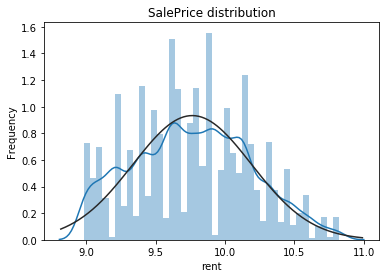

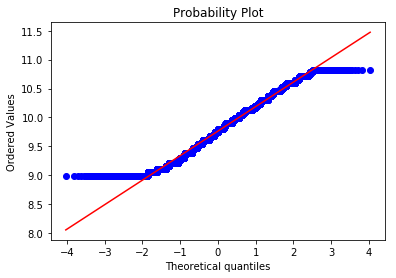

In [74]:
#correcting the skewness of target feature
target = np.log1p(target)

sns.distplot(target,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target);
# QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

In [75]:
#splitting the data
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(mydata,target,test_size=0.2,random_state = 20)

C:\Users\Rahul-Akshay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
mylr = LinearRegression()

In [78]:
mylr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
#assigning the predicting and actual values
yp = mylr.predict(x_test)
ya = y_test

In [80]:
#scores of train,test data
print(mylr.score(x_train,y_train))
print(mylr.score(x_test,y_test))

0.9560619084828458
0.9493619984658316


In [81]:
#calculating the root mean square error
print(np.sqrt(np.mean(ya-yp)**2))

0.0003607422914439219
